In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from model_utils import *

In [2]:
# Target (y) column
y_var = 'DIABETE3'

In [3]:
# Unused feature columns
x_var_to_drop = [
    'DIABAGE2', 'PDIABTST', 'PREDIAB1', 'INSULIN', 
    'BLDSUGAR', 'DOCTDIAB', 'CHKHEMO3', 'FEETCHK', 
    'EYEEXAM1', 'DIABEYE', 'DIABEDU'
]                        

In [4]:
# Load Data
brfss_df = pd.read_csv('Data/LLCP2018_cleaned.csv.gz').sample(3000)
var_type_df = pd.read_csv('Data/var_type.csv')

In [5]:
# Preprocessing
X_train, X_test, y_train, y_test = preprocess(brfss_df, var_type_df, y_var, x_var_to_drop)

Preprocessing...
Number of records: 2992
Number of features: 491
Train size: 2244
Test size: 748


In [6]:
# Train
parameters = {
    'max_depth': [7, 8, 9],
    'n_estimators': [30, 60, 90],
    'learning_rate': [0.1, 0.25, 0.5],
    'colsample': [0.6, 0.8, 1.0]         # the fraction of columns to use in each tree
}
clf = train(
    X_train, y_train, 
    model_save_path='model_output/test.joblib', 
    parameters=parameters
)

Start Grid Search...
Fitting 5 folds for each of 81 candidates, totalling 405 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   24.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 405 out of 405 | elapsed:  4.7min finished


Best parameter:
{'colsample': 0.6, 'learning_rate': 0.5, 'max_depth': 9, 'n_estimators': 60}
Best score: 0.2559


In [7]:
# Report
print('Train:')
report(clf, X_train, y_train)
print('Test:')
report(clf, X_test, y_test)

Train:
Accuracy: 1.0
F1 Score: 1.0
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1929
         1.0       1.00      1.00      1.00       315

    accuracy                           1.00      2244
   macro avg       1.00      1.00      1.00      2244
weighted avg       1.00      1.00      1.00      2244


Test:
Accuracy: 0.8368983957219251
F1 Score: 0.24691358024691357
              precision    recall  f1-score   support

         0.0       0.86      0.96      0.91       631
         1.0       0.44      0.17      0.25       117

    accuracy                           0.84       748
   macro avg       0.65      0.57      0.58       748
weighted avg       0.80      0.84      0.81       748




       variable  mean(|SHAP|)      gain       cover
0         _BMI5      0.637657  1.413251   23.799056
1      PNEUVAC4      0.457389  3.121830   65.438530
2  CHECKUP1_1.0      0.398241  4.159109  140.619762
3         WTKG3      0.368937  0.775708   14.001738
4   GENHLTH_4.0      0.244092  1.543403   33.617780
5   GENHLTH_2.0      0.238302  2.303054   51.596107
6   GENHLTH_1.0      0.231106  3.133878  109.953515
7      FLSHTMY2      0.225205  0.916866   17.696021
8          HTM4      0.216825  0.577632    8.825669
9      POORHLTH      0.215374  0.603502   13.233932


,variable,mean(|SHAP|),gain,cover
0,_BMI5,0.637657,1.413251,23.799056
1,PNEUVAC4,0.457389,3.121830,65.438530
2,CHECKUP1_1.0,0.398241,4.159109,140.619762
3,WTKG3,0.368937,0.775708,14.001738
4,GENHLTH_4.0,0.244092,1.543403,33.617780
...,...,...,...,...
486,SUNPRTCT_3.0,0.000000,0.000000,0.000000
487,SUNPRTCT_2.0,0.000000,0.000000,0.000000
488,SUNPRTCT_1.0,0.000000,0.000000,0.000000
489,SEATBELT_8.0,0.000000,0.000000,0.000000


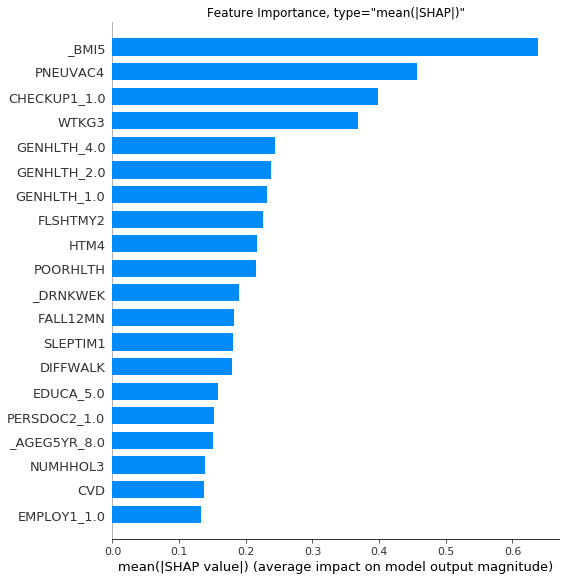

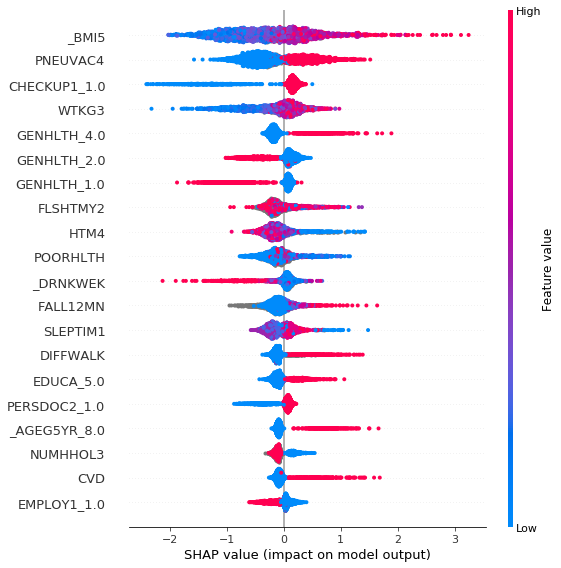

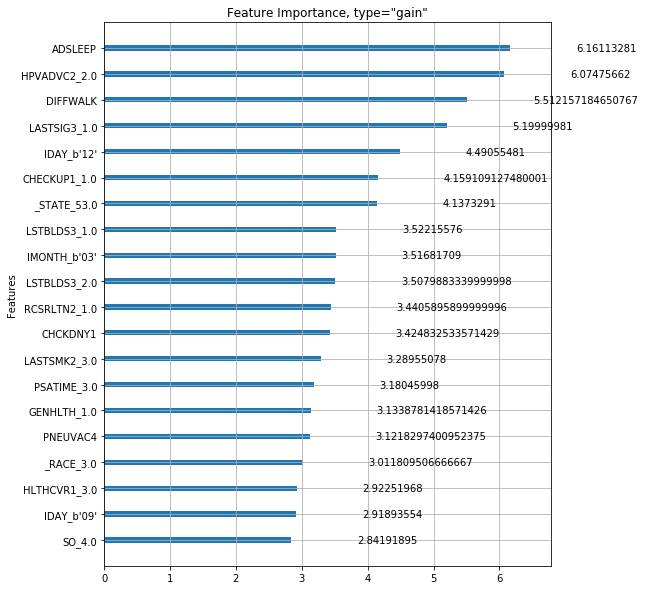

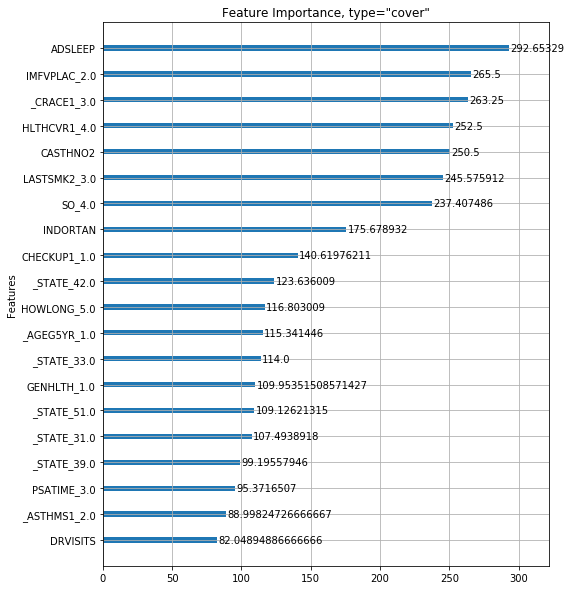

In [8]:
# Interpret
interpret_model(clf, X_train, output_folder='./model_output')